In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import time
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [ ]:
#Read and Analyse Data
data = pd.read_csv('/content/drive/MyDrive/binf 730/data.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#Delete id, diagnosis and unnamed:32
col = data.columns       # .columns gives columns names in data
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
y = data.diagnosis                          # M or B
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


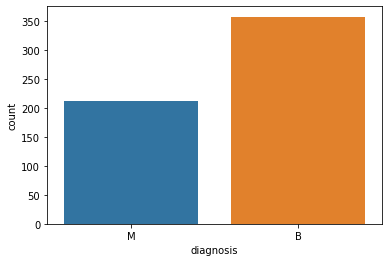

In [ ]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

Visualization

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

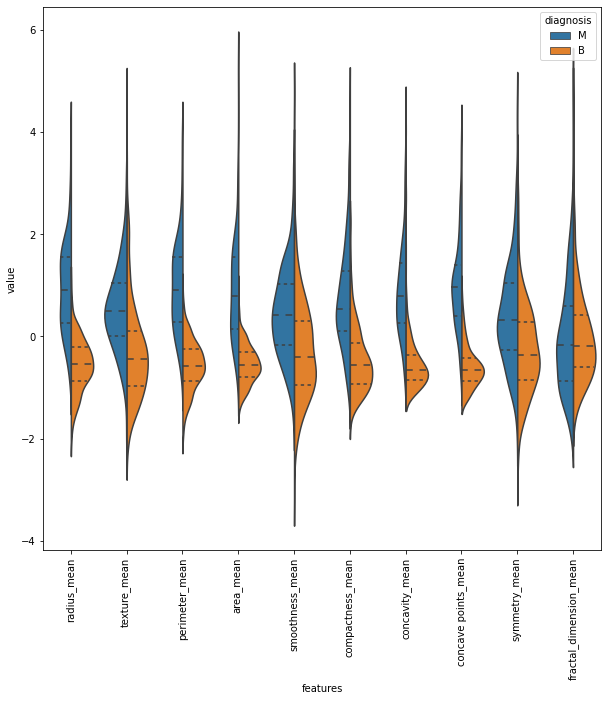

In [ ]:
#violin plot
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

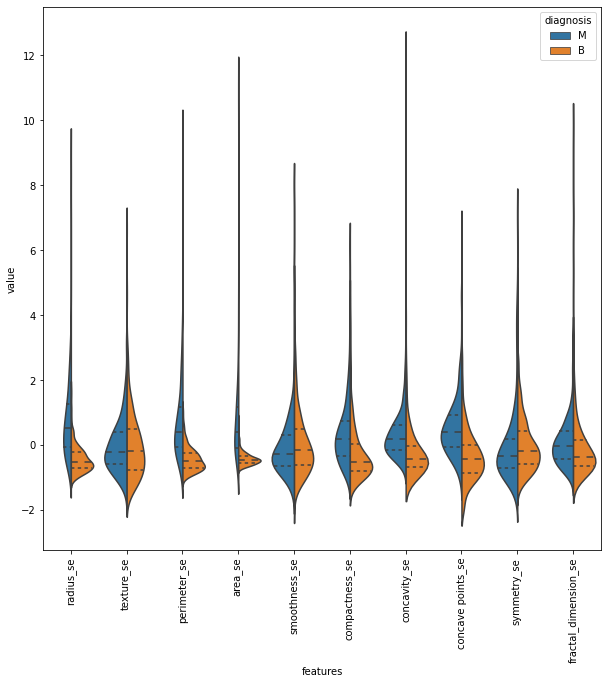

In [ ]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

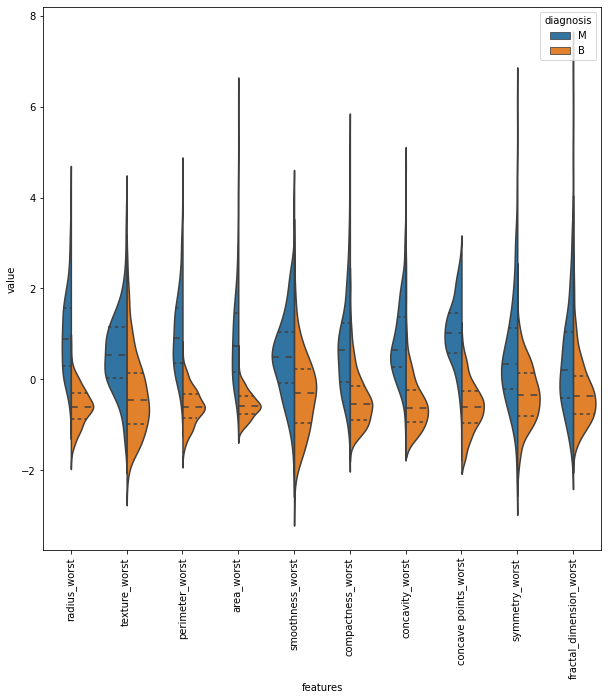

In [ ]:
# Third ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

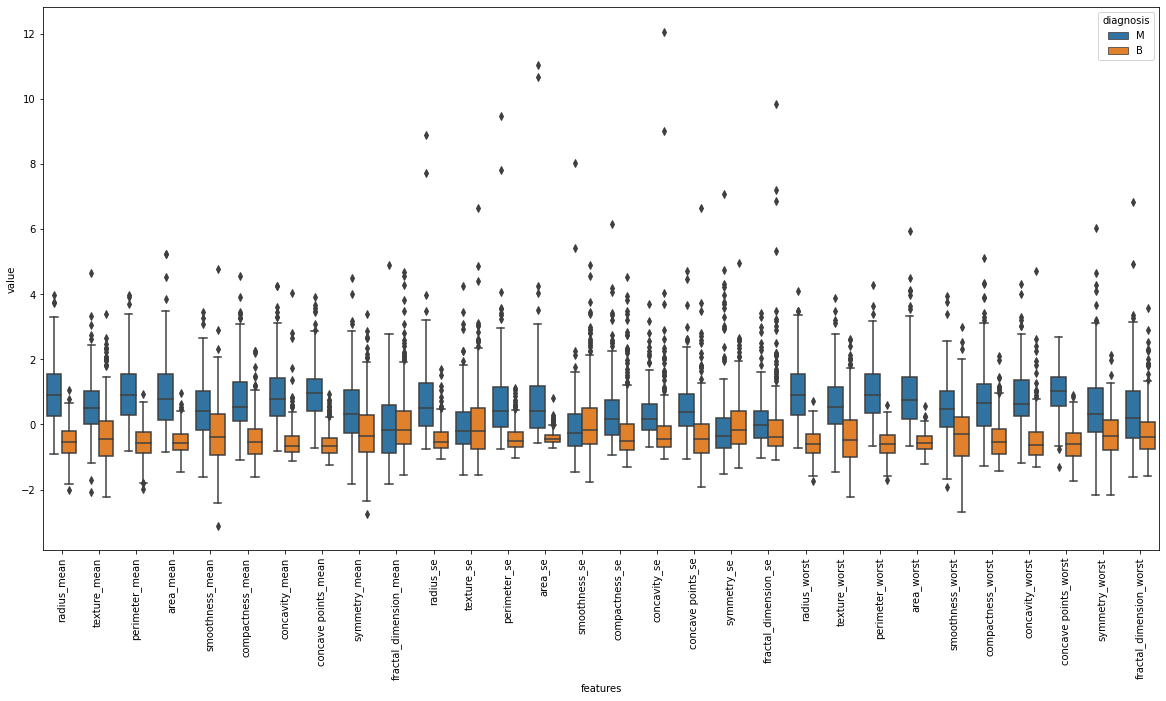

In [ ]:
#box plot
data = pd.concat([y,data_n_2.iloc[:,:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

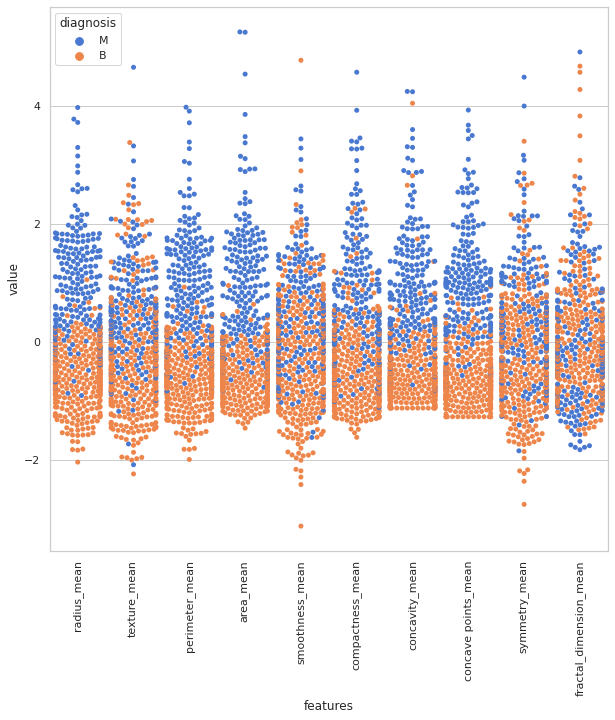

In [ ]:
#swarm plot
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
#tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

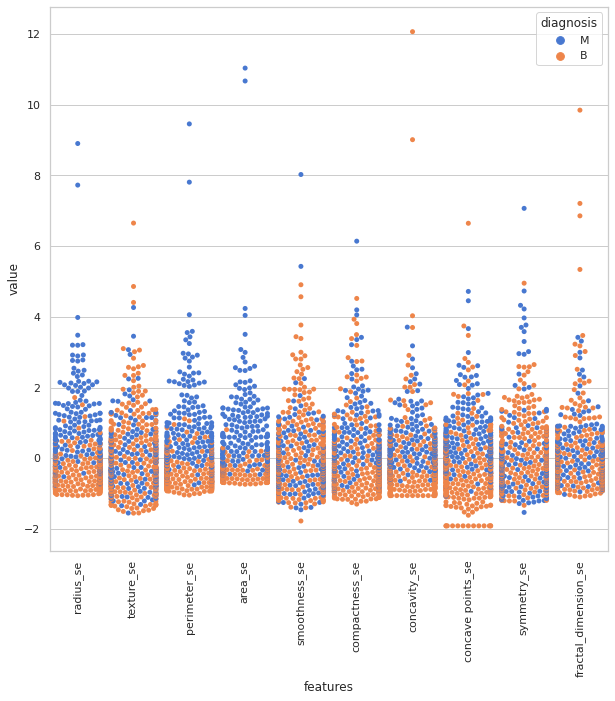

In [ ]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

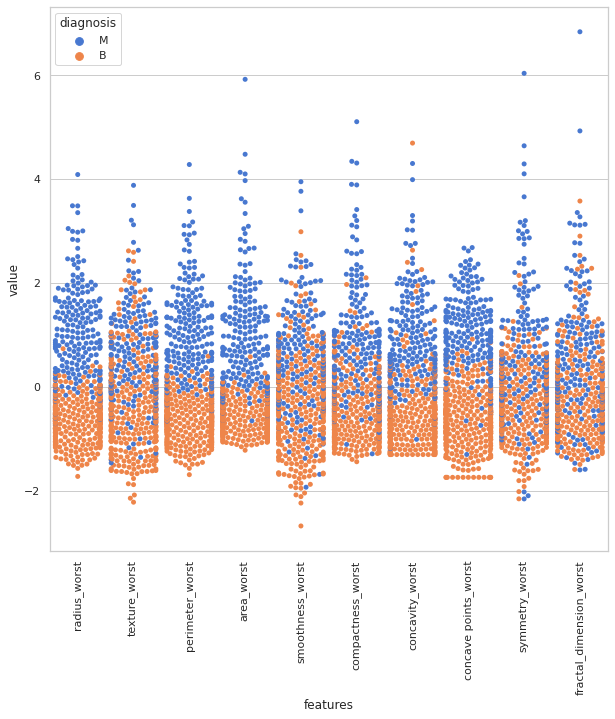

In [ ]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)

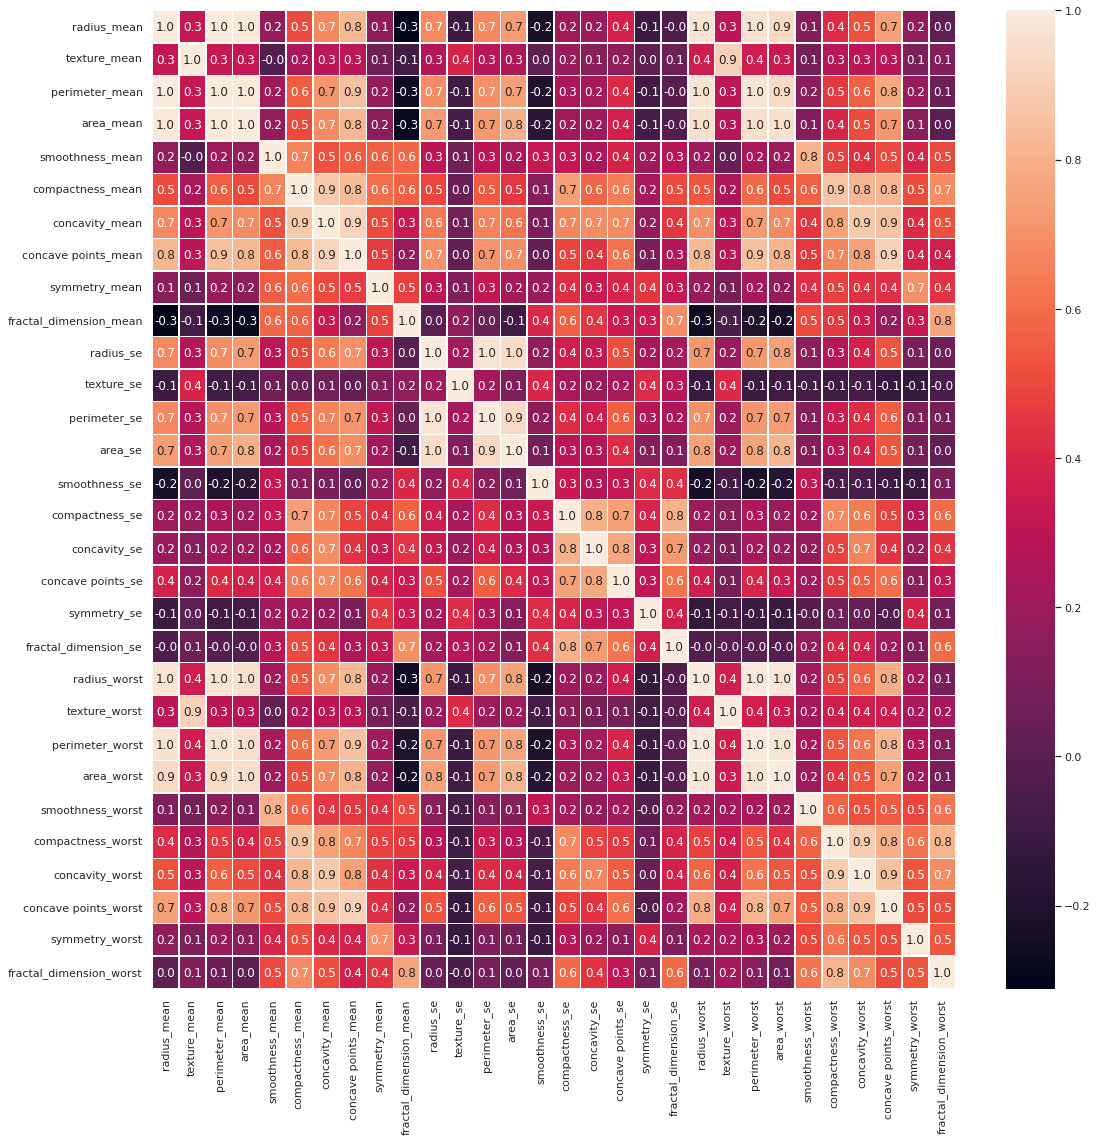

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

1. **radius_mean**, **perimeter_mean** and **area_mean** are correlated with each other so we will use only **area_mean**.
1.   **Compactness_mean**, **concavity_mean** and **concave points_mean** are correlated with each other.Therefore I only choose **concavity_mean**.
2.  Apart from these, **radius_se**,  **perimeter_se**,  **and area_se** are correlated and I only use **area_se**.
3. **radius_worst**, **perimeter_worst** and **area_worst** are correlated so I use **area_worst**.
4. **Compactness_worst**, **concavity_worst** and **concave points_worst** so I use **concavity_worst**.
5. **Compactness_se**, **concavity_se** and **concave points_se** so I use **concavity_se**.
6. **texture_mean** and **texture_worst** are correlated and I use **texture_mean**.
7. **area_worst** and **area_mean** are correlated, I use **area_mean**.



In [ ]:
#random forest model based our selection
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )
x_1.head()


,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


Accuracy is:  0.9707602339181286


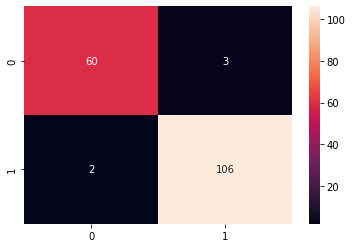

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
sc = StandardScaler()
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
#Recursive feature elimination with cross validation. In paper, they used all features to do this. But I used the features except the correlated
#Every time the features are not the same. The number of selected features are 11, 13, or 16
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier()
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy', min_features_to_select = 11)   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])


Optimal number of features : 16
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Accuracy is:  0.9824561403508771


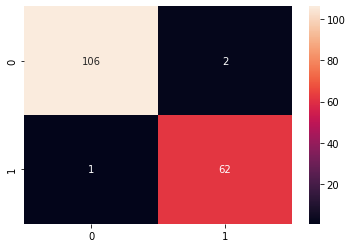

In [ ]:
#random forest model
x_3 = pd.concat([x_1['texture_mean'], x_1['area_mean'], x_1['smoothness_mean'], x_1['concavity_mean'],x_1['symmetry_mean'],  x_1['fractal_dimension_mean'], x_1['texture_se'],  x_1['area_se'], x_1['smoothness_se'], x_1['concavity_se'], x_1['symmetry_se']], axis=1)
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_3, y, test_size=0.3, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.9736842105263158


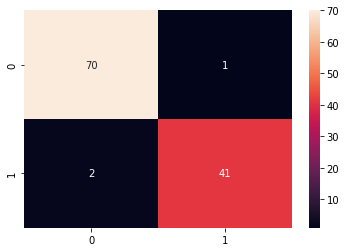

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_3, y, test_size=0.2, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Feature ranking:
1. feature 1 (0.230642)
2. feature 3 (0.205625)
3. feature 7 (0.165906)
4. feature 13 (0.126280)
5. feature 0 (0.051508)
6. feature 14 (0.038969)
7. feature 9 (0.035795)
8. feature 12 (0.030531)
9. feature 2 (0.018128)
10. feature 15 (0.016742)
11. feature 5 (0.014640)
12. feature 8 (0.014269)
13. feature 4 (0.013877)
14. feature 6 (0.013126)
15. feature 10 (0.012780)
16. feature 11 (0.011183)


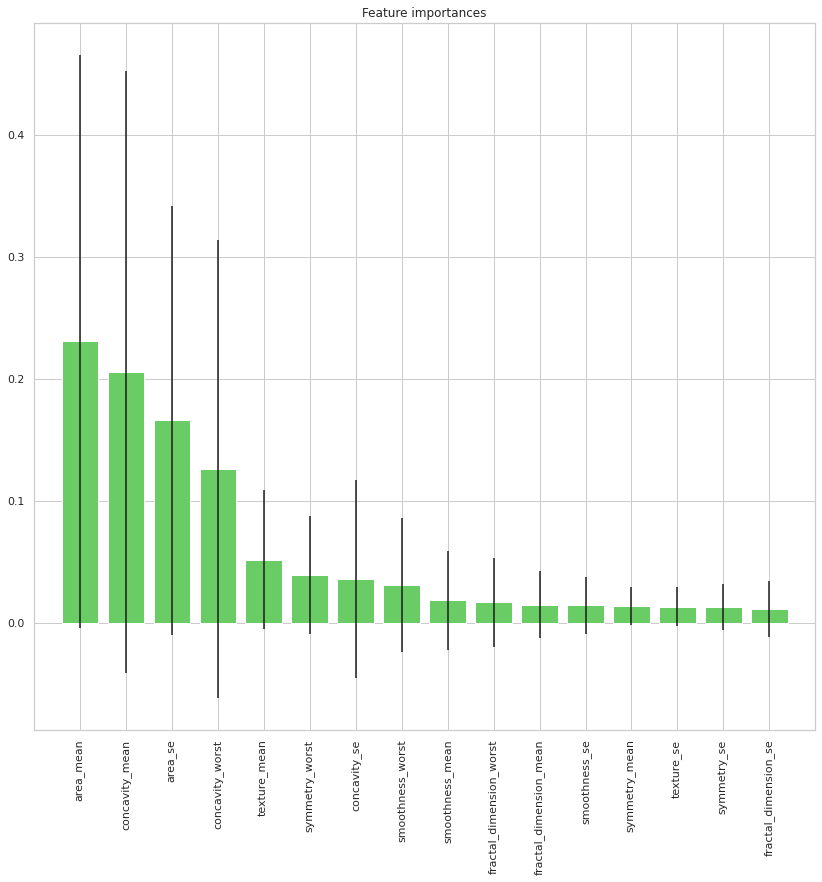

In [ ]:
#Tree for all features
clf_rf_2 = RandomForestClassifier()
clr_rf_2 = clf_rf_2.fit(x_train,y_train)
importances = clr_rf_2.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],  yerr = std[indices], color="g", align="center")
plt.xticks(range(x_1.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

Accuracy is:  0.9649122807017544


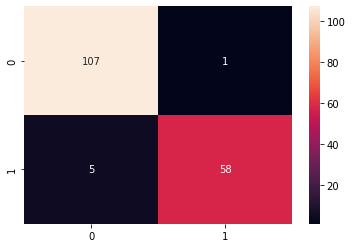

In [ ]:
#select top 11 like paper done
x_2 = pd.concat([x_1['area_mean'], x_1['concavity_mean'], x_1['concavity_worst'], x_1['area_se'],x_1['texture_mean'],  x_1['symmetry_worst'], x_1['concavity_se'],  x_1['smoothness_worst'], x_1['smoothness_mean'], x_1['fractal_dimension_worst'], x_1['fractal_dimension_mean']], axis=1)

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_2, y, test_size=0.3, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.9736842105263158


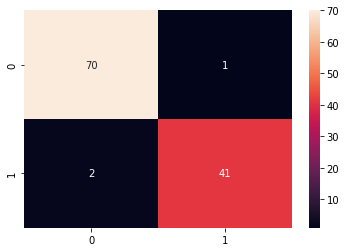

In [ ]:
## split data train 80% and test 20 %
x_train, x_test, y_train, y_test = train_test_split(x_2, y, test_size=0.2, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.9824561403508771


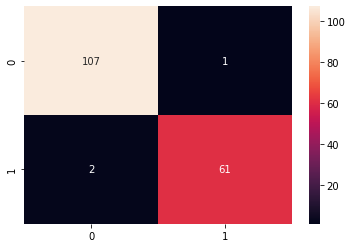

In [ ]:
#selected top 8
x_3 = pd.concat([x_1['area_mean'], x_1['concavity_mean'], x_1['concavity_worst'], x_1['area_se'], x_1['texture_mean'], x_1['symmetry_worst'], x_1['concavity_se'],  x_1['smoothness_worst']], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_3, y, test_size=0.3, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

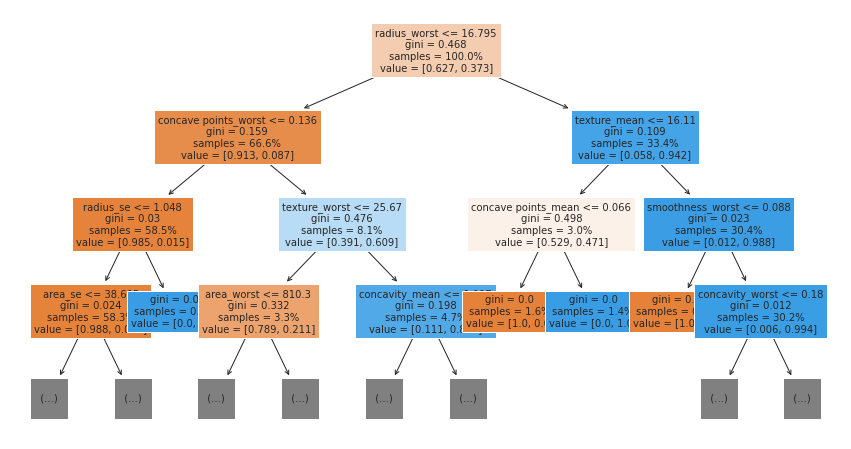

In [ ]:
#decision tree cannot classify well
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(random_state=34)
tree.fit(x, y)
plt.figure(figsize=(15,8))
plot_tree(tree, filled=True, fontsize=10, feature_names=x.columns, proportion = True)
plt.show()

Accuracy is:  0.9707602339181286


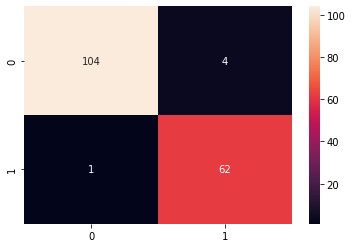

In [ ]:
#11 features in paper(In paper, they don't exactly metion which 11 features they used. Here I used are the top 11 features based on the Table 4)
x_4 = pd.concat([x_1['area_mean'], x_1['concavity_mean'], x_1['area_se'], x_1['concavity_worst'],x_1['concavity_se'],  x_1['smoothness_worst'], x_1['fractal_dimension_se'],  x_1['texture_mean'], x_1['smoothness_mean'], x_1['symmetry_worst'], x_1['smoothness_se']], axis=1)
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_4, y, test_size=0.3, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.9824561403508771


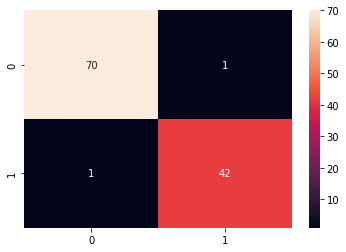

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_4, y, test_size=0.2, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

There we have 3 datasets.
1. Recursive feature elimination with cross validation - 11 features: texture_mean, area_mean, smoothness_mean, concavity_mean, symmetry_mean, fractal_dimension_mean, texture_se,  area_se, smoothness_se, concavity_se,symmetry_se
2. Tree for all features - 8 features: area_mean, concavity_mean, concavity_worst, area_se, texture_mean, symmetry_worst, concavity_se,  smoothness_worst
3. From paper - 11 features: area_mean, concavity_mean, area_se, concavity_worst, concavity_se,  smoothness_worst, fractal_dimension_se,  texture_mean, smoothness_mean, symmetry_worst, smoothness_se

In [ ]:
#3 datasets
data1 = pd.concat([x_1['texture_mean'], x_1['area_mean'], x_1['smoothness_mean'], x_1['concavity_mean'],x_1['symmetry_mean'],  x_1['fractal_dimension_mean'], x_1['texture_se'],  x_1['area_se'], x_1['smoothness_se'], x_1['concavity_se'], x_1['symmetry_se']], axis=1)
data2 = pd.concat([x_1['area_mean'], x_1['concavity_mean'], x_1['concavity_worst'], x_1['area_se'], x_1['texture_mean'], x_1['symmetry_worst'], x_1['concavity_se'],  x_1['smoothness_worst']], axis=1)
data3 = pd.concat([x_1['area_mean'], x_1['concavity_mean'], x_1['concavity_worst'], x_1['area_se'],x_1['texture_mean'],  x_1['symmetry_worst'], x_1['concavity_se'],  x_1['smoothness_worst'], x_1['smoothness_mean'], x_1['fractal_dimension_worst'], x_1['fractal_dimension_mean']], axis=1)


In [ ]:
diagonsis = {'M': 0,'B': 1}
y = [diagonsis[item] for item in y]
y = np.array(y)

In [ ]:
#ANN data1
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
x_train, x_test, y_train, y_test = train_test_split(data1, y, test_size=0.3, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)

classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=11))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))
# Adding the second hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size=10, epochs=100)

6/6 [==============================] - 0s 4ms/step
Our accuracy is 97.07602339181285%


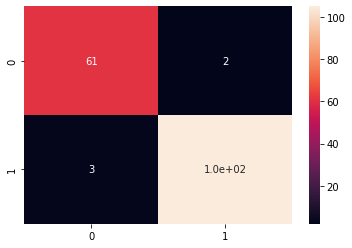

In [ ]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/len(y_test))*100))
sns.heatmap(cm,annot=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data1, y, test_size=0.2, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)

classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=11))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))
# Adding the second hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size=10, epochs=100)

4/4 [==============================] - 0s 3ms/step
Our accuracy is 97.36842105263158%


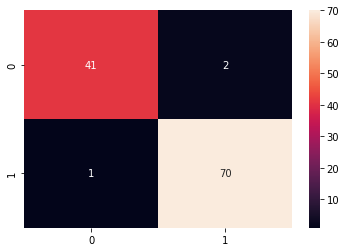

In [ ]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/len(y_test))*100))
sns.heatmap(cm,annot=True)

In [ ]:
#ANN data2
x_train, x_test, y_train, y_test = train_test_split(data2, y, test_size=0.3, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)

classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=8))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))
# Adding the second hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size=10, epochs=100)

6/6 [==============================] - 0s 4ms/step
Our accuracy is 98.83040935672514%


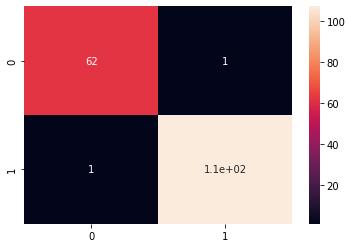

In [ ]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/len(y_test))*100))
sns.heatmap(cm,annot=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data2, y, test_size=0.2, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)

classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=8))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))
# Adding the second hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size=10, epochs=100)

4/4 [==============================] - 0s 5ms/step
Our accuracy is 98.24561403508771%


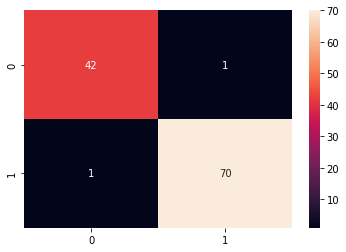

In [ ]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/len(y_test))*100))
sns.heatmap(cm,annot=True)

In [ ]:
#ANN data3
x_train, x_test, y_train, y_test = train_test_split(data3, y, test_size=0.3, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)

classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=11))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))
# Adding the second hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size=10, epochs=100)

6/6 [==============================] - 0s 4ms/step
Our accuracy is 97.6608187134503%


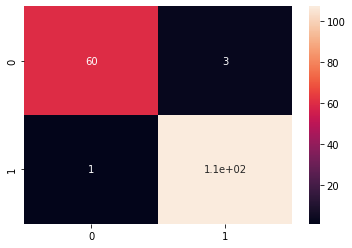

In [ ]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/len(y_test))*100))
sns.heatmap(cm,annot=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data3, y, test_size=0.2, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)

classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=11))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))
# Adding the second hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size=10, epochs=100)

4/4 [==============================] - 0s 3ms/step
Our accuracy is 98.24561403508771%


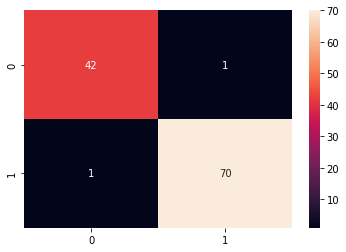

In [ ]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/len(y_test))*100))
sns.heatmap(cm,annot=True)

In [ ]:
#Gradient Boosting
#data 1
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

sc = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(data1, y, test_size=0.3, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)

gradient_booster = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 180)

gradient_booster.fit(x_train,y_train)
y_pred = gradient_booster.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9649122807017544


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data1, y, test_size=0.2, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)

gradient_booster = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 180)

gradient_booster.fit(x_train,y_train)
y_pred = gradient_booster.predict(x_test)
print(accuracy_score(y_test, y_pred))


0.9736842105263158


In [ ]:
#data 2
x_train, x_test, y_train, y_test = train_test_split(data2, y, test_size=0.3, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)

gradient_booster = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 180)

gradient_booster.fit(x_train,y_train)
y_pred = gradient_booster.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9707602339181286


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data2, y, test_size=0.2, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)

gradient_booster = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 180)

gradient_booster.fit(x_train,y_train)
y_pred = gradient_booster.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9649122807017544


In [ ]:
#data 3
x_train, x_test, y_train, y_test = train_test_split(data3, y, test_size=0.3, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)

gradient_booster = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 180)

gradient_booster.fit(x_train,y_train)
y_pred = gradient_booster.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9824561403508771


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data3, y, test_size=0.2, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)

gradient_booster = GradientBoostingClassifier(learning_rate = 1, loss = 'exponential', n_estimators = 180)

gradient_booster.fit(x_train,y_train)
y_pred = gradient_booster.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9824561403508771


In [ ]:
#SVM
#data1
from sklearn.svm import SVC
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(data1, y, test_size=0.3, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)
clf = SVC(kernel='linear')

# fitting x samples and y classes
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data1, y, test_size=0.2, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)
clf = SVC(kernel='linear')

# fitting x samples and y classes
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158


In [ ]:
#data2
x_train, x_test, y_train, y_test = train_test_split(data2, y, test_size=0.3, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)
clf = SVC(kernel='linear')

# fitting x samples and y classes
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9883040935672515


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data2, y, test_size=0.2, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)
clf = SVC(kernel='linear')

# fitting x samples and y classes
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158


In [ ]:
#data3
x_train, x_test, y_train, y_test = train_test_split(data3, y, test_size=0.3, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)
clf = SVC(kernel='linear')

# fitting x samples and y classes
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9883040935672515


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data3, y, test_size=0.2, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)
clf = SVC(kernel='linear')

# fitting x samples and y classes
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9912280701754386


In [ ]:
#MLP
#data1
from sklearn.neural_network import MLPClassifier
x_train, x_test, y_train, y_test = train_test_split(data1, y, test_size=0.3, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)

clf = MLPClassifier(hidden_layer_sizes=(6,3,),
                              random_state=5,
                              learning_rate_init=0.01)
clf.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(6, 3), learning_rate_init=0.01,
              random_state=5)

In [ ]:
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,y_pred)

0.9707602339181286

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data1, y, test_size=0.2, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)

clf = MLPClassifier(hidden_layer_sizes=(6,3,),
                              random_state=5,
                              learning_rate_init=0.01)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,y_pred)

0.9649122807017544

In [ ]:
#data2
x_train, x_test, y_train, y_test = train_test_split(data2, y, test_size=0.3, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)

clf = MLPClassifier(hidden_layer_sizes=(6,3,),
                              random_state=5,
                              learning_rate_init=0.01)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,y_pred)

0.9883040935672515

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data2, y, test_size=0.2, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)

clf = MLPClassifier(hidden_layer_sizes=(6,3,),
                              random_state=5,
                              learning_rate_init=0.01)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,y_pred)

0.9736842105263158

In [ ]:
#data3
x_train, x_test, y_train, y_test = train_test_split(data3, y, test_size=0.3, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)

clf = MLPClassifier(hidden_layer_sizes=(6,3,),
                              random_state=5,
                              learning_rate_init=0.01)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,y_pred)

0.9707602339181286

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data3, y, test_size=0.2, random_state=42)
x_train =  sc.fit_transform(x_train)
x_test = sc.transform(x_test)

clf = MLPClassifier(hidden_layer_sizes=(6,3,),
                              random_state=5,
                              learning_rate_init=0.01)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,y_pred)

0.9649122807017544